In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import re

In [2]:
df=pd.read_csv('../data/final_feature_set.csv',encoding='latin1')
df.head()

,CC_Scaled,HP_Scaled,Speed_Scaled,Seats,Torque_Log,Company_ASTON MARTIN,Company_AUDI,Company_Acura,Company_BENTLEY,Company_BMW,...,Fuel_Type_Petrol/AWD,Fuel_Type_Petrol/Diesel,Fuel_Type_Petrol/EV,Fuel_Type_Petrol/Hybrid,Fuel_Type_Plug-in Hybrid,Fuel_Type_plug in hyrbrid,Is_Anomaly,PCA1,PCA2,Target_Price_Log
0,0.624532,2.944721,2.330591,2.0,6.685861,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,-4.604327,0.294622,13.910822
1,2.074685,1.147904,0.632817,5.0,6.803505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.507727,1.937144,13.038984
2,-0.841915,-1.032982,-0.970637,5.0,4.795791,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.448026,-1.248704,9.510519
3,0.620327,1.448871,0.632817,4.0,6.803505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.886150,0.719450,11.989166
4,1.262620,1.323094,1.953308,2.0,6.329721,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.895383,-0.298343,12.442294


In [3]:
df.shape

(1218, 67)

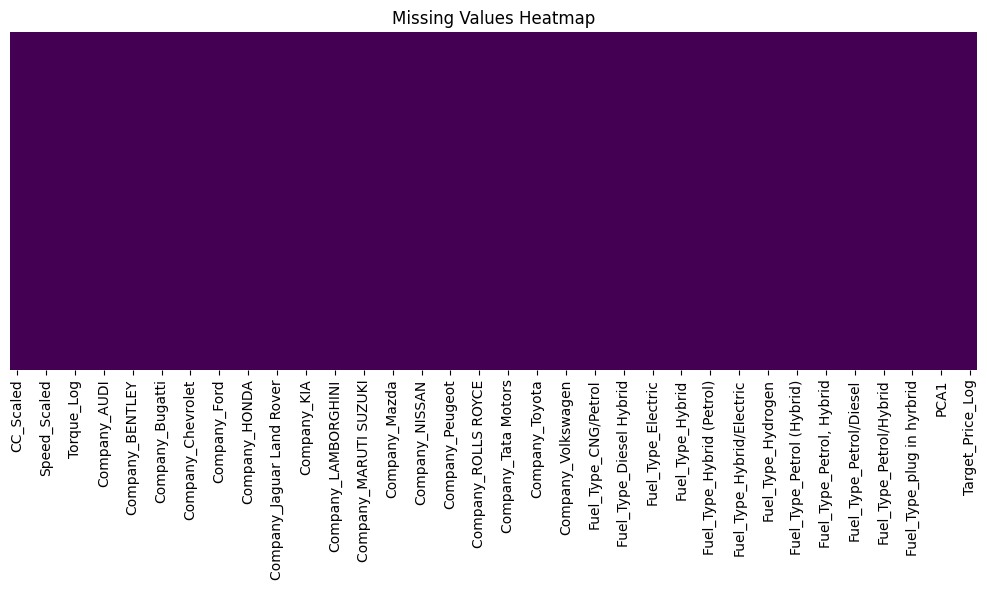

In [4]:
# 1. Null Value Analysis
null_data = df.isnull().sum()
null_percent = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({'Missing Values': null_data, 'Percentage': null_percent})

# Plot Null Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()


now, we don't have any null values here as we handled previously.

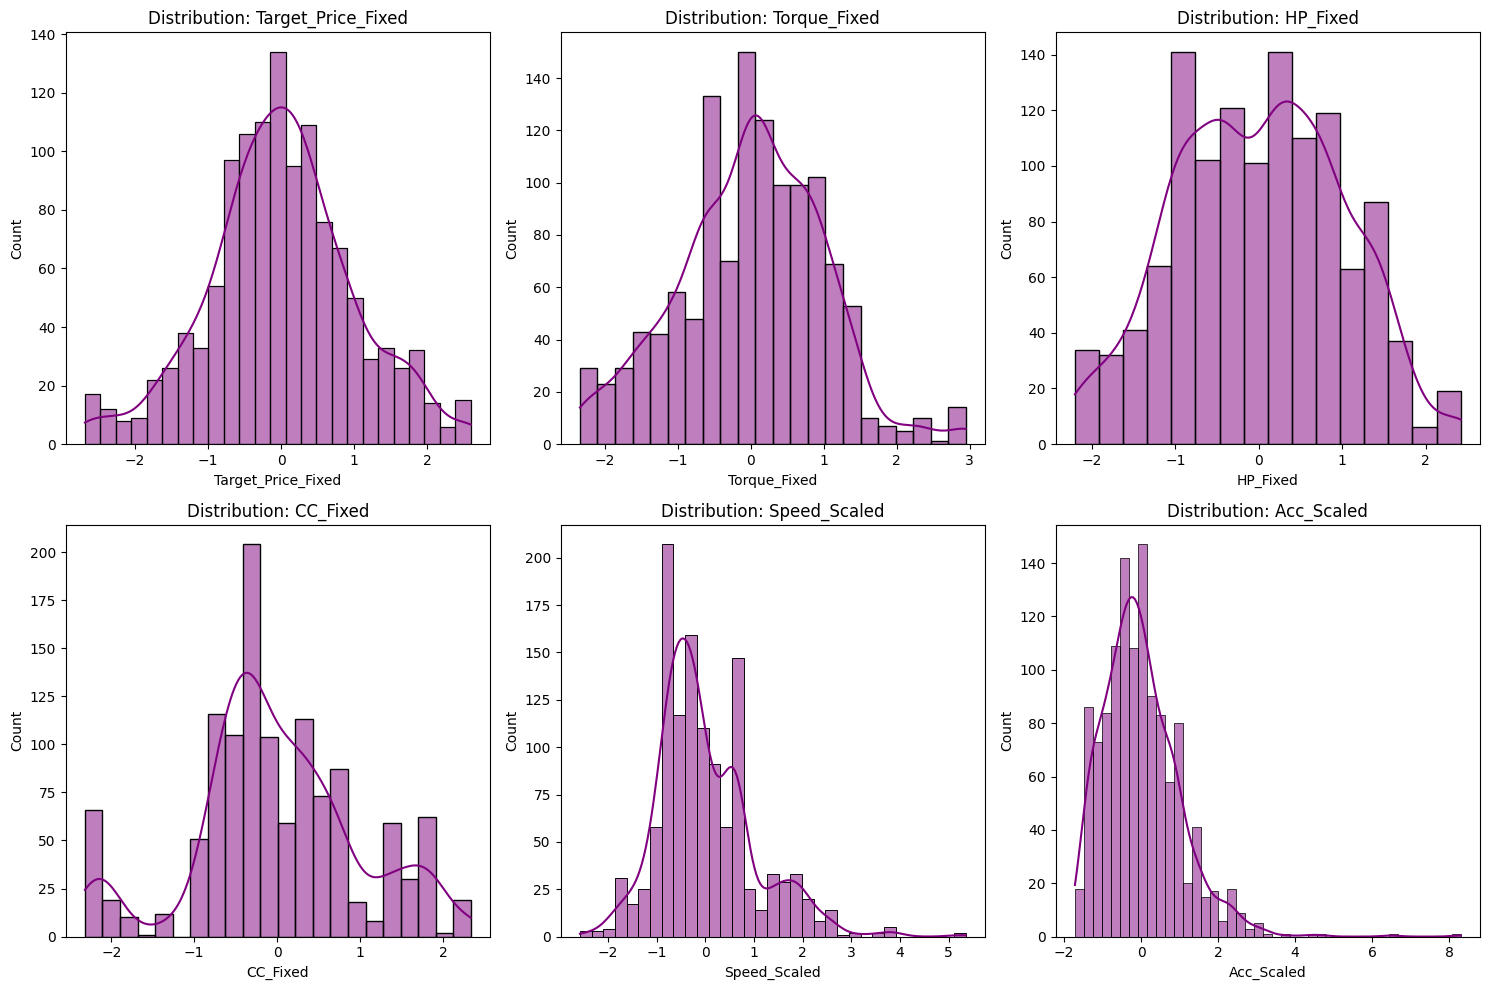

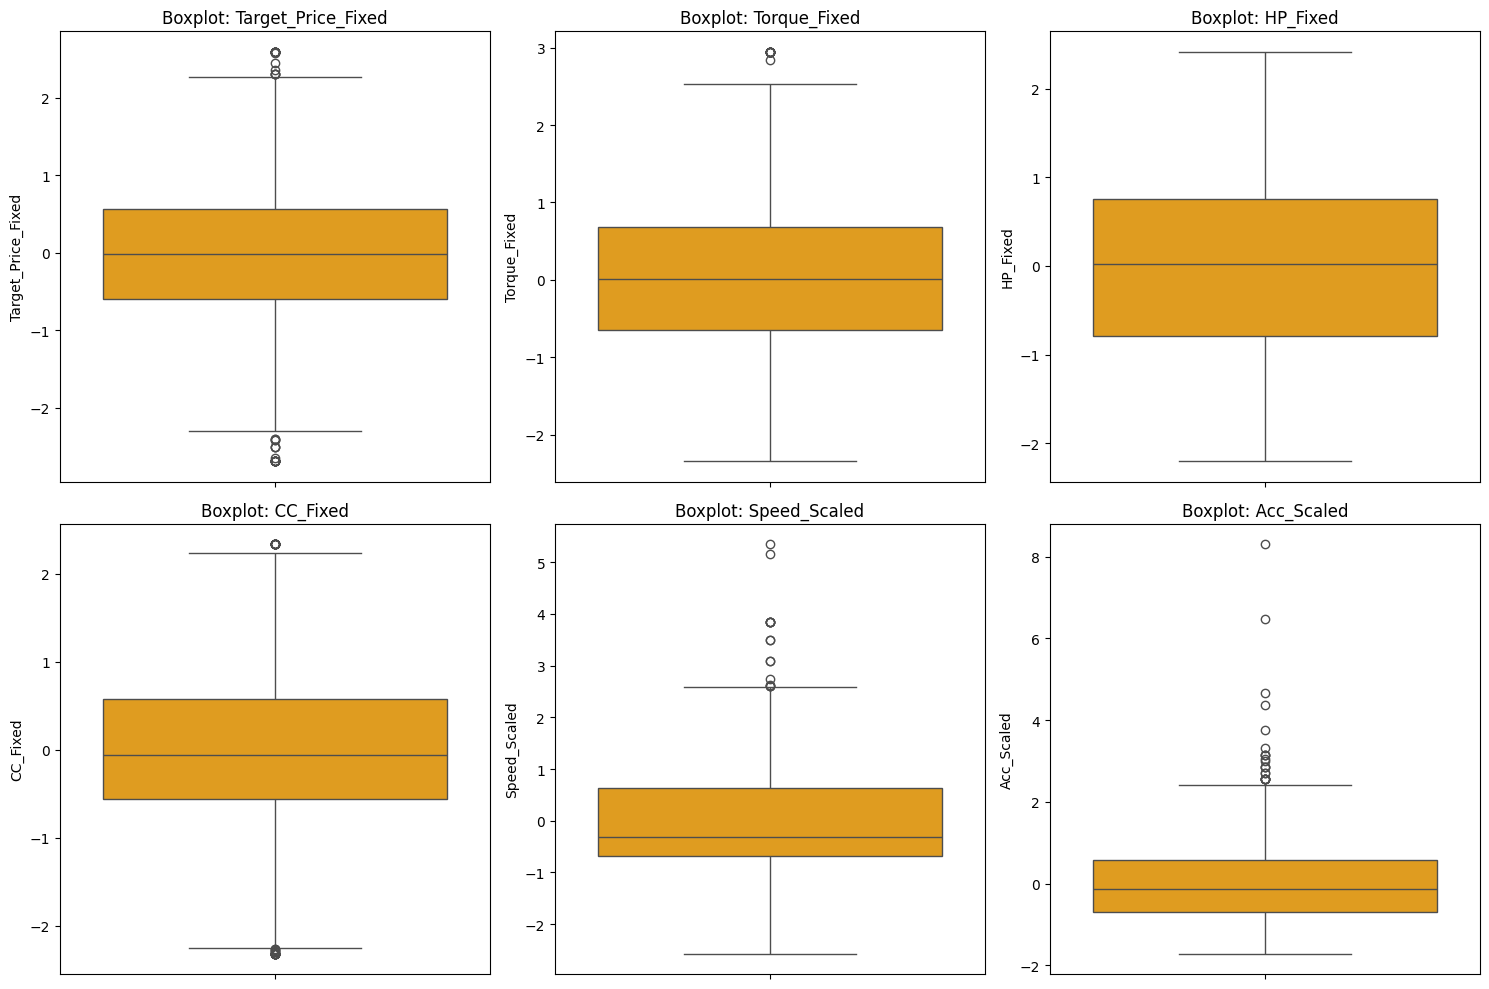

In [14]:


# Load the final feature set
df_final = pd.read_csv('../data/final_feature_set.csv')

# Price_Log and Torque_Log are the ones we transformed to fix skewness
cols_to_check = ['Target_Price_Fixed', 'Torque_Fixed', 'HP_Fixed', 'CC_Fixed', 'Speed_Scaled', 'Acc_Scaled']

# 1. Distribution Comparison (Histograms)
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_final[col], kde=True, color='purple')
    plt.title(f'Distribution: {col}')
plt.tight_layout()

# 2. Outlier Check (Boxplots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_final[col], color='orange')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()



we have problems here see the outliers. Let's apply Quantile Clipping and the Yeo-Johnson Power Transformation and after applung the Quantile Tranformation again in preprocessing, now we have bell curves and little bit skewness here. 